In [1]:
# Importing TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

tf.enable_eager_execution()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


## Now, we will import the dataset containing gray scale images of 10 different kinds of clothing items. Each image is 28X28 pixels in size. 

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [3]:
train_dataset, test_dataset = dataset['train'], dataset['test']

## The dataset contains 10 different numeric labels, each of which corresponds to a different clothing item.

In [4]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',
              'Bag', 'Ankle_Boot']

## Exploring the data that we have now

In [5]:
print(metadata.splits['train'].num_examples)
print(metadata.splits['test'].num_examples)
print(metadata.features['label'].num_classes)

60000
10000
10


In [6]:
tfds.list_builders()
print(metadata)
print(f"this is the type of metadata: {type(metadata)}")

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=1.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    urls=['https://github.com/zalandoresearch/fashion-mnist'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10)
    },
    total_num_examples=70000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=10000>,
        'train': <tfds.core.SplitInfo num_examples=60000>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @article{DBLP:journals/corr/abs-1708-07747,
          author    = {Han Xiao and
                       Kashif Rasul and
                       Roland Vollgraf},
          title     = {Fashion-MNIST: a Novel Image Dataset for Benchmark

## Checking the number of observations in training and testing data splits

In [7]:
print(f"Number of examples in training split: {metadata.splits['train'].num_examples}")
print(f"Number of examples in test split: {metadata.splits['test'].num_examples}")

Number of examples in training split: 60000
Number of examples in test split: 10000


## Preprocessing the data
### The value of each pixel in the image data is an integer in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. So here we create a normalization function and apply it to each image in the training and testing datasets.

In [8]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

#The map function applies any function to each example in the dataset.
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

## Exploring the preprocessed data
### Let's plot an image to see what it looks like

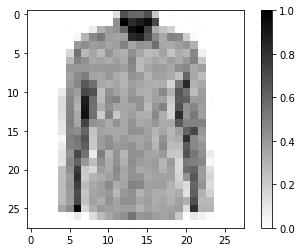

In [9]:
# Take a single image and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Now, plotting the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

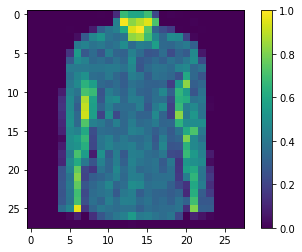

In [10]:
# Take a single image and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Now, plotting the image
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

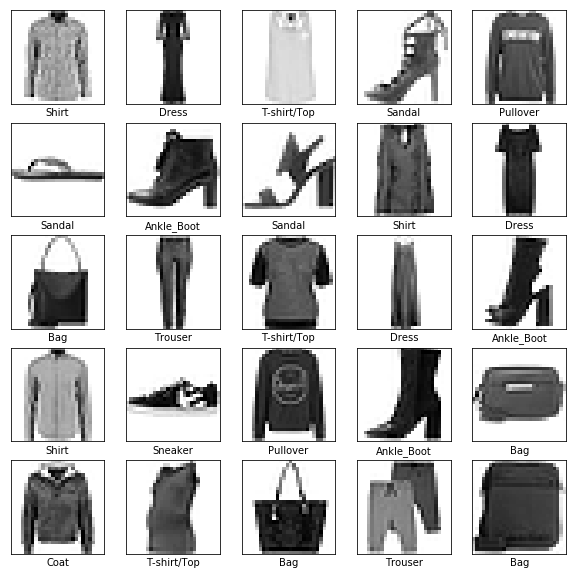

In [11]:
plt.figure(figsize=(10,10))
i = 0
for image, label in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

## Building the model
### 1. Setting up the layers
### 2. Compiling the model

We use Flatten in order to convert the images which are in the shape (28,28,1) into one-dimensional vectors
And the activation function "softmax" is used to convert the outputs from the nodes into probabilities so that we can use the probabilities to predict the class to which an image belongs to.

In [12]:
"Setting up the layers"

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)    
])

Now, we will compile the model that we have created

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [14]:
BATCH_SIZE = 32
num_training_examples = metadata.splits['train'].num_examples
train_dataset = train_dataset.repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Training our model

In [15]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_training_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - ETA: 2:11:07 - loss: 2.3199 - acc: 0.09 - ETA: 12:00 - loss: 1.7248 - acc: 0.4403 - ETA: 6:02 - loss: 1.4555 - acc: 0.5227 - ETA: 4:03 - loss: 1.2795 - acc: 0.580 - ETA: 3:07 - loss: 1.1767 - acc: 0.611 - ETA: 2:33 - loss: 1.1124 - acc: 0.632 - ETA: 2:07 - loss: 1.0560 - acc: 0.647 - ETA: 1:49 - loss: 1.0049 - acc: 0.662 - ETA: 1:37 - loss: 0.9776 - acc: 0.671 - ETA: 1:26 - loss: 0.9431 - acc: 0.682 - ETA: 1:18 - loss: 0.9149 - acc: 0.692 - ETA: 1:11 - loss: 0.8868 - acc: 0.699 - ETA: 1:05 - loss: 0.8638 - acc: 0.706 - ETA: 1:00 - loss: 0.8497 - acc: 0.714 - ETA: 55s - loss: 0.8323 - acc: 0.722 - ETA: 52s - loss: 0.8146 - acc: 0.72 - ETA: 49s - loss: 0.8025 - acc: 0.73 - ETA: 46s - loss: 0.7899 - acc: 0.73 - ETA: 44s - loss: 0.7804 - acc: 0.73 - ETA: 42s - loss: 0.7740 - acc: 0.73 - ETA: 40s - loss: 0.7629 - acc: 0.74 - ETA: 38s - loss: 0.7551 - acc: 0.74 - ETA: 36s - loss: 0.7447 - acc: 0.74 - ETA: 35s - loss: 0.7356 - acc: 0.75 -

1875/1875 [==============================] - ETA: 1:52 - loss: 0.3234 - acc: 0.875 - ETA: 17s - loss: 0.4500 - acc: 0.838 - ETA: 12s - loss: 0.4325 - acc: 0.84 - ETA: 11s - loss: 0.4273 - acc: 0.84 - ETA: 11s - loss: 0.4383 - acc: 0.84 - ETA: 10s - loss: 0.4269 - acc: 0.85 - ETA: 10s - loss: 0.4191 - acc: 0.85 - ETA: 10s - loss: 0.4162 - acc: 0.85 - ETA: 9s - loss: 0.4114 - acc: 0.8558 - ETA: 9s - loss: 0.3973 - acc: 0.859 - ETA: 9s - loss: 0.3954 - acc: 0.862 - ETA: 9s - loss: 0.3927 - acc: 0.862 - ETA: 9s - loss: 0.3902 - acc: 0.863 - ETA: 8s - loss: 0.3902 - acc: 0.863 - ETA: 8s - loss: 0.3901 - acc: 0.862 - ETA: 8s - loss: 0.3868 - acc: 0.864 - ETA: 8s - loss: 0.3860 - acc: 0.865 - ETA: 8s - loss: 0.3832 - acc: 0.864 - ETA: 8s - loss: 0.3828 - acc: 0.864 - ETA: 8s - loss: 0.3861 - acc: 0.864 - ETA: 8s - loss: 0.3854 - acc: 0.865 - ETA: 8s - loss: 0.3862 - acc: 0.864 - ETA: 8s - loss: 0.3890 - acc: 0.863 - ETA: 8s - loss: 0.3883 - acc: 0.864 - ETA: 8s - loss: 0.3868 - acc: 0.864 - E

1875/1875 [==============================] - ETA: 1:52 - loss: 0.6037 - acc: 0.781 - ETA: 17s - loss: 0.3800 - acc: 0.856 - ETA: 13s - loss: 0.3411 - acc: 0.87 - ETA: 12s - loss: 0.3366 - acc: 0.87 - ETA: 11s - loss: 0.3499 - acc: 0.86 - ETA: 11s - loss: 0.3567 - acc: 0.86 - ETA: 11s - loss: 0.3594 - acc: 0.87 - ETA: 10s - loss: 0.3530 - acc: 0.86 - ETA: 10s - loss: 0.3417 - acc: 0.87 - ETA: 10s - loss: 0.3358 - acc: 0.87 - ETA: 10s - loss: 0.3300 - acc: 0.87 - ETA: 9s - loss: 0.3278 - acc: 0.8775 - ETA: 9s - loss: 0.3293 - acc: 0.878 - ETA: 9s - loss: 0.3339 - acc: 0.878 - ETA: 9s - loss: 0.3364 - acc: 0.876 - ETA: 9s - loss: 0.3339 - acc: 0.875 - ETA: 9s - loss: 0.3326 - acc: 0.876 - ETA: 9s - loss: 0.3346 - acc: 0.876 - ETA: 9s - loss: 0.3349 - acc: 0.876 - ETA: 9s - loss: 0.3365 - acc: 0.875 - ETA: 8s - loss: 0.3399 - acc: 0.874 - ETA: 8s - loss: 0.3407 - acc: 0.874 - ETA: 8s - loss: 0.3408 - acc: 0.874 - ETA: 8s - loss: 0.3424 - acc: 0.874 - ETA: 8s - loss: 0.3419 - acc: 0.875 - E

1875/1875 [==============================] - ETA: 1:52 - loss: 0.2476 - acc: 0.937 - ETA: 21s - loss: 0.3093 - acc: 0.887 - ETA: 17s - loss: 0.3324 - acc: 0.88 - ETA: 15s - loss: 0.3333 - acc: 0.88 - ETA: 14s - loss: 0.3247 - acc: 0.88 - ETA: 13s - loss: 0.3193 - acc: 0.88 - ETA: 12s - loss: 0.3240 - acc: 0.88 - ETA: 11s - loss: 0.3203 - acc: 0.88 - ETA: 11s - loss: 0.3180 - acc: 0.88 - ETA: 10s - loss: 0.3160 - acc: 0.88 - ETA: 10s - loss: 0.3072 - acc: 0.88 - ETA: 10s - loss: 0.3061 - acc: 0.88 - ETA: 10s - loss: 0.3031 - acc: 0.89 - ETA: 10s - loss: 0.3099 - acc: 0.88 - ETA: 10s - loss: 0.3094 - acc: 0.88 - ETA: 9s - loss: 0.3112 - acc: 0.8883 - ETA: 9s - loss: 0.3096 - acc: 0.887 - ETA: 9s - loss: 0.3096 - acc: 0.888 - ETA: 9s - loss: 0.3115 - acc: 0.887 - ETA: 9s - loss: 0.3131 - acc: 0.886 - ETA: 9s - loss: 0.3124 - acc: 0.886 - ETA: 9s - loss: 0.3131 - acc: 0.886 - ETA: 9s - loss: 0.3137 - acc: 0.886 - ETA: 8s - loss: 0.3166 - acc: 0.885 - ETA: 8s - loss: 0.3153 - acc: 0.885 - E

1875/1875 [==============================] - ETA: 1:59 - loss: 0.3509 - acc: 0.843 - ETA: 17s - loss: 0.2839 - acc: 0.894 - ETA: 13s - loss: 0.2838 - acc: 0.89 - ETA: 11s - loss: 0.2830 - acc: 0.89 - ETA: 11s - loss: 0.2950 - acc: 0.89 - ETA: 10s - loss: 0.2893 - acc: 0.89 - ETA: 10s - loss: 0.2851 - acc: 0.89 - ETA: 10s - loss: 0.2818 - acc: 0.89 - ETA: 9s - loss: 0.2796 - acc: 0.8977 - ETA: 9s - loss: 0.2786 - acc: 0.899 - ETA: 9s - loss: 0.2812 - acc: 0.900 - ETA: 9s - loss: 0.2824 - acc: 0.897 - ETA: 9s - loss: 0.2804 - acc: 0.897 - ETA: 9s - loss: 0.2830 - acc: 0.896 - ETA: 9s - loss: 0.2841 - acc: 0.895 - ETA: 9s - loss: 0.2875 - acc: 0.894 - ETA: 9s - loss: 0.2883 - acc: 0.892 - ETA: 9s - loss: 0.2885 - acc: 0.892 - ETA: 9s - loss: 0.2887 - acc: 0.892 - ETA: 8s - loss: 0.2884 - acc: 0.892 - ETA: 8s - loss: 0.2944 - acc: 0.890 - ETA: 8s - loss: 0.2959 - acc: 0.891 - ETA: 8s - loss: 0.2970 - acc: 0.891 - ETA: 8s - loss: 0.2963 - acc: 0.891 - ETA: 8s - loss: 0.2973 - acc: 0.890 - E

## Evaluate the accuracy of the model now

In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/32))
print(f"The accuracy on the test dataset is: {test_accuracy}")

313/313 [==============================] - ETA: 6s - loss: 0.2954 - acc: 0.906 - ETA: 1s - loss: 0.3108 - acc: 0.893 - ETA: 1s - loss: 0.3583 - acc: 0.868 - ETA: 1s - loss: 0.3493 - acc: 0.868 - ETA: 1s - loss: 0.3646 - acc: 0.865 - ETA: 1s - loss: 0.3573 - acc: 0.872 - ETA: 1s - loss: 0.3543 - acc: 0.872 - ETA: 1s - loss: 0.3485 - acc: 0.872 - ETA: 1s - loss: 0.3468 - acc: 0.871 - ETA: 1s - loss: 0.3538 - acc: 0.869 - ETA: 1s - loss: 0.3509 - acc: 0.870 - ETA: 1s - loss: 0.3498 - acc: 0.871 - ETA: 0s - loss: 0.3525 - acc: 0.868 - ETA: 0s - loss: 0.3510 - acc: 0.869 - ETA: 0s - loss: 0.3496 - acc: 0.870 - ETA: 0s - loss: 0.3482 - acc: 0.872 - ETA: 0s - loss: 0.3499 - acc: 0.871 - ETA: 0s - loss: 0.3462 - acc: 0.874 - ETA: 0s - loss: 0.3513 - acc: 0.872 - ETA: 0s - loss: 0.3524 - acc: 0.872 - ETA: 0s - loss: 0.3506 - acc: 0.873 - ETA: 0s - loss: 0.3524 - acc: 0.871 - ETA: 0s - loss: 0.3548 - acc: 0.871 - ETA: 0s - loss: 0.3577 - acc: 0.870 - ETA: 0s - loss: 0.3580 - acc: 0.870 - ETA: 0s

In [18]:
test_accuracy

0.8705

## Making predictions

In [20]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [21]:
predictions.shape

(32, 10)

The model predicticted the label for each image in the testing set.

In [24]:
""" Let's take a look at the first prediction from the above predictions """
predictions[0]
# the following are the probabilities of for each of the 10 different classes. The class that has the highest
# probability can be considered as the predicted class for the image.

array([3.1021686e-04, 4.1632401e-08, 8.4902886e-03, 7.2051094e-05,
       4.2285237e-02, 1.4983526e-07, 9.4880885e-01, 1.3974270e-07,
       3.3048196e-05, 5.1870472e-09], dtype=float32)

In [25]:
np.argmax(predictions[0])
# The following index value denotes the class of the image

6

In [27]:
test_labels[0]
# The following is the actual class of the same image.

6